<a href="https://colab.research.google.com/github/sangho24/sogang/blob/main/EC5320_2024_2_Week5a_Tabular_to_image_and_classify_v1_w_missing_parts_20200572.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  기계학습 실습 Week 4 (tabular data를 이미지로 변환 후 classification)

2024.9.23.<br>

서강대 경제대학 양현주 (hyang@sogang.ac.kr)<br><br>


Tabular data source **(Search 'Olive Oil' data)**: <br>
http://www.timeseriesclassification.com/dataset.php <br><br>

Main source of codes: <br>

https://github.com/fastai/fastbook/blob/master/01_intro.ipynb <br>
https://github.com/fastai/fastbook/blob/master/02_production.ipynb <br>
https://gist.github.com/oguiza/c9c373aec07b96047d1ba484f23b7b47 <br><br>

Visual explanation on GAF:<br>

https://medium.com/analytics-vidhya/encoding-time-series-as-images-b043becbdbf3 <br><br>

An example of using GAF to financial data by Chen and Tsai (2020): <br>

https://doi.org/10.1186/s40854-020-00187-0 <br><br>

An example of using GAF to classify human activity with wearable devices: <br>

https://ieeexplore.ieee.org/document/9234451

# 1. Install and import libraries

In [ ]:
import fastai
print(fastai.__version__)

from fastai.vision.all import *
#from fastai.text.all import *
#from fastai.collab import *
#from fastai.tabular.all import *

from matplotlib.pyplot import imshow

2.7.17


In [ ]:
from google.colab import files

# 2. Download file

In [ ]:
# set the name of the folder to download images
img_folder_nm = 'oliveoil'

# set the name of the zip file to be downloaded
img_zipfile_nm = 'OliveOil.zip'

In [ ]:
"""
다운로드 및 압축 풀기 코드 입력
"""
#%%capture

!unzip {img_zipfile_nm} -d {img_folder_nm}

Archive:  OliveOil.zip
  inflating: oliveoil/OliveOil.txt   
  inflating: oliveoil/OliveOil_TEST.arff  
  inflating: oliveoil/OliveOil_TEST.txt  
  inflating: oliveoil/OliveOil_TRAIN.arff  
  inflating: oliveoil/OliveOil_TRAIN.txt  
  inflating: oliveoil/OliveOil_TEST.ts  
  inflating: oliveoil/OliveOil_TRAIN.ts  


In [ ]:
!ls

oliveoil  OliveOil.zip	sample_data


# 3. Load raw files as Pandas dataframes

In [ ]:
# 파일이 많지 않아서 합침
from pathlib import Path
train_csv = Path('{}/OliveOil_TRAIN.txt'.format(img_folder_nm))
valid_csv = Path('{}/OliveOil_TEST.txt'.format(img_folder_nm))

In [ ]:
import pandas as pd
train_df = pd.read_csv(train_csv, delim_whitespace=True, header=None)
train_df

<ipython-input-7-a63173bb5518>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_df = pd.read_csv(train_csv, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.611375,-0.610586,-0.606557,-0.601132,-0.594315,-0.585762,-0.577419,-0.570175,-0.563285,...,-0.979553,-0.980385,-0.980328,-0.980220,-0.980691,-0.981337,-0.982336,-0.983213,-0.983672,-0.983120
1,1.0,-0.615392,-0.613729,-0.609228,-0.604315,-0.598768,-0.590507,-0.581617,-0.572926,-0.565374,...,-0.979210,-0.979335,-0.979523,-0.980038,-0.981146,-0.982332,-0.982570,-0.982630,-0.982850,-0.982549
2,1.0,-0.611999,-0.610500,-0.606374,-0.600445,-0.593084,-0.585245,-0.577118,-0.568827,-0.561596,...,-0.979514,-0.979663,-0.979964,-0.980563,-0.981326,-0.982744,-0.983107,-0.983033,-0.983956,-0.983858
3,1.0,-0.622784,-0.622222,-0.619049,-0.613251,-0.605889,-0.597508,-0.589047,-0.580697,-0.572822,...,-0.968819,-0.969902,-0.970586,-0.970718,-0.971197,-0.972268,-0.972654,-0.972861,-0.973671,-0.973614
4,1.0,-0.621793,-0.621272,-0.617298,-0.612074,-0.605472,-0.597607,-0.589165,-0.581424,-0.574620,...,-0.977420,-0.977831,-0.978376,-0.978778,-0.979656,-0.981148,-0.981796,-0.981331,-0.981289,-0.981331
5,2.0,-0.600229,-0.599577,-0.596144,-0.590664,-0.583358,-0.574398,-0.565483,-0.557200,-0.549211,...,-0.986319,-0.987329,-0.987618,-0.988062,-0.988807,-0.989265,-0.989560,-0.989695,-0.990430,-0.990874
6,2.0,-0.615430,-0.614164,-0.610041,-0.603962,-0.596794,-0.588885,-0.579624,-0.571410,-0.564899,...,-0.978359,-0.978609,-0.979123,-0.979192,-0.979726,-0.980732,-0.980855,-0.981049,-0.982046,-0.982640
7,2.0,-0.614015,-0.612369,-0.608472,-0.602971,-0.596025,-0.588022,-0.579095,-0.570355,-0.562975,...,-0.977127,-0.977156,-0.977082,-0.978072,-0.978743,-0.979156,-0.980033,-0.980179,-0.980446,-0.981325
8,2.0,-0.596650,-0.595023,-0.591794,-0.586665,-0.579232,-0.571202,-0.562909,-0.554685,-0.547703,...,-0.986295,-0.986149,-0.986728,-0.987620,-0.988761,-0.989280,-0.989334,-0.989841,-0.990268,-0.990883
9,2.0,-0.620747,-0.620111,-0.616434,-0.611036,-0.603726,-0.595674,-0.587556,-0.579830,-0.573194,...,-0.975419,-0.975879,-0.976500,-0.977168,-0.977320,-0.977985,-0.978558,-0.978633,-0.978808,-0.979470


In [ ]:
valid_df = pd.read_csv(valid_csv, delim_whitespace=True, header=None)
valid_df

<ipython-input-8-906e27c245fd>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  valid_df = pd.read_csv(valid_csv, delim_whitespace=True, header=None)


,0,1,2,3,4,5,6,7,8,9,...,561,562,563,564,565,566,567,568,569,570
0,1.0,-0.621957,-0.620677,-0.616684,-0.611012,-0.603769,-0.595267,-0.586477,-0.577899,-0.570147,...,-0.966336,-0.967106,-0.967484,-0.967454,-0.967817,-0.968638,-0.969142,-0.969541,-0.970344,-0.970377
1,1.0,-0.618925,-0.618361,-0.614664,-0.608693,-0.601446,-0.593516,-0.585786,-0.577708,-0.569952,...,-0.971519,-0.971990,-0.972353,-0.973022,-0.973667,-0.973943,-0.974423,-0.974906,-0.975525,-0.975858
2,1.0,-0.618169,-0.616704,-0.612678,-0.607578,-0.600574,-0.592209,-0.584307,-0.576085,-0.567684,...,-0.976493,-0.976940,-0.977284,-0.977284,-0.977531,-0.978806,-0.979570,-0.979820,-0.980319,-0.980089
3,1.0,-0.613445,-0.611719,-0.607739,-0.602477,-0.595154,-0.587271,-0.579135,-0.570903,-0.563252,...,-0.976533,-0.977072,-0.977317,-0.977812,-0.978423,-0.979332,-0.979976,-0.980131,-0.980358,-0.980385
4,1.0,-0.616338,-0.615301,-0.611505,-0.605503,-0.597522,-0.589108,-0.580610,-0.572432,-0.565709,...,-0.974940,-0.975242,-0.975344,-0.975936,-0.976761,-0.977364,-0.977648,-0.978043,-0.978808,-0.978584
5,2.0,-0.618782,-0.617716,-0.613997,-0.608234,-0.601079,-0.593254,-0.585160,-0.577374,-0.569800,...,-0.974467,-0.974664,-0.974808,-0.975386,-0.975538,-0.976176,-0.977076,-0.977115,-0.977705,-0.978321
6,2.0,-0.618084,-0.615795,-0.611206,-0.605597,-0.598689,-0.591469,-0.583601,-0.574438,-0.567063,...,-0.974884,-0.975553,-0.975290,-0.975443,-0.976166,-0.977054,-0.977661,-0.977825,-0.977879,-0.978005
7,2.0,-0.611166,-0.610133,-0.606317,-0.600795,-0.593912,-0.585110,-0.576604,-0.569136,-0.562062,...,-0.981540,-0.981895,-0.982864,-0.983285,-0.983986,-0.985206,-0.985308,-0.985060,-0.985320,-0.986107
8,2.0,-0.611302,-0.610611,-0.607795,-0.601815,-0.594525,-0.586312,-0.577069,-0.568377,-0.561396,...,-0.977748,-0.978070,-0.978492,-0.979135,-0.980142,-0.981493,-0.982160,-0.981877,-0.981701,-0.982029
9,2.0,-0.622387,-0.621123,-0.617521,-0.612813,-0.606186,-0.598040,-0.590471,-0.582751,-0.574777,...,-0.977619,-0.978230,-0.978459,-0.978754,-0.979418,-0.980146,-0.980762,-0.981045,-0.981799,-0.982103


In [ ]:
# concatenate train and valid set together

df = pd.concat([train_df, valid_df])
df.shape # 30+30개씩 합침

(60, 571)

# 4. Create label arrays (ground truth data)

In [ ]:
y_train = train_df[[0]].to_numpy(dtype=int).reshape(-1)
y_train

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [ ]:
y_valid = valid_df[[0]].to_numpy(dtype=int).reshape(-1)
y_valid

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

# 5. Remove labels from df and scale feature values

In [ ]:
# minmax scale

from sklearn.preprocessing import MinMaxScaler

# load scaler
scaler = MinMaxScaler() # 흑백 이미지의 한 픽셀의 값 = 0~255 사이 -> 컬러 이미지는 RGB 총 3개의 layer가 존재 -> 모든 수치를 같은 범주로 만들어줌

# fit ->
scaler.fit(train_df.iloc[:, 1:]) # fit on train set to get common min and max values

# transform dataframes (take out first column which is label)
X_train = pd.DataFrame(scaler.transform(train_df.iloc[:, 1:]), dtype='float32')
X_valid = pd.DataFrame(scaler.transform(valid_df.iloc[:, 1:]), dtype='float32')

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
0,0.358067,0.355823,0.378694,0.388408,0.386555,0.406783,0.413601,0.389623,0.383649,0.380071,...,0.590959,0.579164,0.597925,0.613935,0.624188,0.641020,0.621194,0.590047,0.583302,0.608917
1,0.232015,0.259692,0.297728,0.286401,0.245094,0.260113,0.279321,0.299162,0.313247,0.294755,...,0.603417,0.616723,0.626186,0.620320,0.608032,0.606230,0.613048,0.610499,0.611548,0.628273
2,0.338497,0.358436,0.384239,0.410423,0.425656,0.422747,0.423233,0.433956,0.440583,0.424907,...,0.592370,0.604973,0.610685,0.601874,0.601660,0.591834,0.594359,0.596360,0.573529,0.583857
3,0.000000,0.000000,0.000000,0.000000,0.018897,0.043673,0.041631,0.043673,0.062207,0.062029,...,0.980236,0.954140,0.939835,0.947723,0.961166,0.957940,0.958132,0.953223,0.927060,0.931542
4,0.031101,0.029038,0.053080,0.037731,0.032142,0.040612,0.037860,0.019781,0.001610,0.004576,...,0.668324,0.670538,0.666428,0.664599,0.660936,0.647601,0.640008,0.656069,0.665213,0.669626
5,0.707879,0.692482,0.694363,0.723894,0.734589,0.758041,0.795415,0.816237,0.858001,0.843507,...,0.345624,0.330772,0.342080,0.338452,0.336147,0.363915,0.369803,0.362641,0.351003,0.345727
6,0.230823,0.246406,0.273084,0.297714,0.307803,0.310240,0.343075,0.349006,0.329266,0.309948,...,0.634284,0.642676,0.640213,0.650055,0.658441,0.662143,0.672754,0.665978,0.639203,0.625203
7,0.275224,0.301295,0.320634,0.329467,0.332224,0.336911,0.360004,0.383693,0.394105,0.387285,...,0.678963,0.694650,0.711854,0.689376,0.693342,0.717238,0.701357,0.696479,0.694205,0.669814
8,0.820196,0.831717,0.826250,0.852073,0.865667,0.856854,0.877764,0.898926,0.908854,0.926100,...,0.346481,0.372982,0.373312,0.353955,0.337775,0.363402,0.377688,0.357490,0.356581,0.345432
9,0.063954,0.064540,0.079280,0.070986,0.087582,0.100389,0.089338,0.072187,0.049689,0.055630,...,0.740894,0.740341,0.732268,0.721131,0.743843,0.758145,0.752654,0.750738,0.750494,0.732776


In [ ]:
X_valid

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
0,0.025957,0.047225,0.071693,0.071776,0.086236,0.112975,0.123859,0.135655,0.152393,0.145751,...,1.070276,1.054162,1.048691,1.062389,1.081129,1.084807,1.080335,1.069728,1.041415,1.041397
1,0.121130,0.118064,0.132929,0.146101,0.160013,0.167099,0.145948,0.141936,0.158963,0.160363,...,0.882326,0.879471,0.877815,0.866790,0.873486,0.899407,0.896552,0.881474,0.863353,0.855391
2,0.144841,0.168724,0.193126,0.181824,0.187720,0.207487,0.193272,0.195312,0.235390,0.242722,...,0.701949,0.702381,0.704769,0.717084,0.736340,0.729476,0.717472,0.709077,0.698572,0.711788
3,0.293097,0.321163,0.342864,0.345324,0.359889,0.360129,0.358722,0.365699,0.384765,0.385727,...,0.700497,0.697657,0.703598,0.698526,0.704688,0.711063,0.703314,0.698158,0.697217,0.701740
4,0.202312,0.211632,0.228700,0.248338,0.284672,0.303355,0.311533,0.315430,0.301954,0.304648,...,0.758245,0.763126,0.772844,0.764434,0.763689,0.779839,0.784323,0.771429,0.750487,0.762859
5,0.125623,0.137767,0.153150,0.160811,0.171675,0.175180,0.165975,0.152930,0.164064,0.167709,...,0.775410,0.783794,0.791647,0.783758,0.807077,0.821389,0.804233,0.803981,0.788418,0.771783
6,0.147506,0.196539,0.237768,0.245304,0.247607,0.230357,0.215848,0.249456,0.256320,0.240208,...,0.760305,0.752004,0.774731,0.781758,0.784796,0.790694,0.783895,0.779072,0.782427,0.782526
7,0.364651,0.369661,0.385961,0.399227,0.399354,0.426923,0.439669,0.423776,0.424869,0.436962,...,0.518932,0.525160,0.508909,0.506259,0.507242,0.505777,0.517791,0.525237,0.526673,0.507521
8,0.360378,0.355049,0.341162,0.366535,0.379881,0.389779,0.424798,0.448745,0.447313,0.439285,...,0.656419,0.661982,0.662342,0.652029,0.643693,0.635553,0.627335,0.636916,0.651043,0.645945
9,0.012480,0.033581,0.046320,0.014050,0.009447,0.027254,-0.003926,-0.023854,-0.003670,0.013563,...,0.661116,0.656264,0.663515,0.665428,0.669357,0.682645,0.675964,0.666092,0.647678,0.643420


# 6. Plot some data

In [ ]:
import matplotlib.pyplot as plt

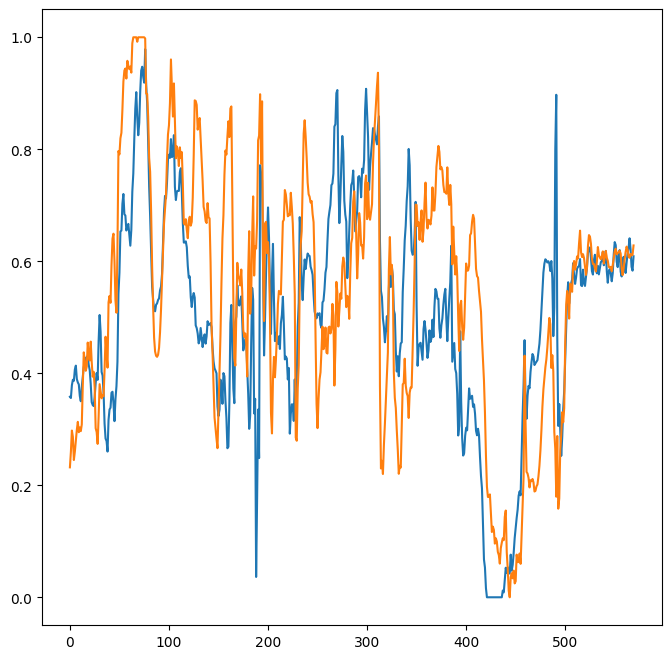

In [ ]:
# plot some rows (class = 1)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[0])
plt.plot(X_train.iloc[1])
plt.show()

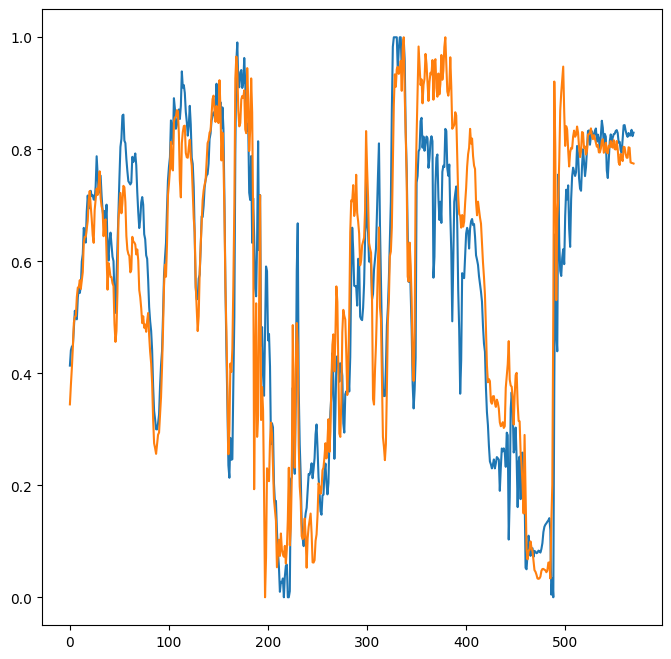

In [ ]:
# plot some rows (class = 4)

plt.figure(figsize=(8, 8))
plt.plot(X_train.iloc[24])
plt.plot(X_train.iloc[25])
plt.show()

# 7. Convert time series to image (Gramian Angular Difference Field)

In [ ]:
!pip install pyts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.0 MB/s eta 0:00:00


In [ ]:
from pyts.image import GramianAngularField # tabular data 를 이미지로 바꿔줌

## 7.1 Transform train dataset to image using GADF

In [ ]:
transformer = GramianAngularField(method='difference')
X_train_GAF = transformer.fit_transform(X_train)
X_train_GAF.shape # 570*570 픽셀이 30 layer가 쌓여있는 이미지로 바뀌게 됨

(30, 570, 570)

In [ ]:
# check min, max values

np.min(X_train_GAF), np.max(X_train_GAF)

(-0.9999999999988254, 0.9999999999988254)

In [ ]:
X_train_GAF[0]

array([[ 0.        , -0.00476378,  0.04348923, ...,  0.46074604,
         0.44821873,  0.4955014 ],
       [ 0.00476378,  0.        ,  0.04824802, ...,  0.46496882,
         0.4524721 ,  0.49963363],
       [-0.04348923, -0.04824802,  0.        , ...,  0.42171204,
         0.4089186 ,  0.45725755],
       ...,
       [-0.46074604, -0.46496882, -0.42171204, ...,  0.        ,
        -0.01406343,  0.03956606],
       [-0.44821873, -0.4524721 , -0.4089186 , ...,  0.01406343,
         0.        ,  0.05361457],
       [-0.4955014 , -0.49963363, -0.45725755, ..., -0.03956606,
        -0.05361457,  0.        ]])

In [ ]:
# Normalise numbers with range (0,255)

X_train_GAF_L = (((X_train_GAF + 1) / 2)*255).astype(int)

In [ ]:
# check min, max values

np.min(X_train_GAF_L), np.max(X_train_GAF_L)

(0, 254)

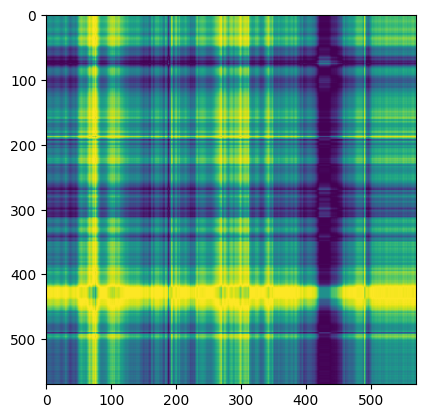

In [ ]:
# plot first row (original array)

imshow(X_train_GAF[0])

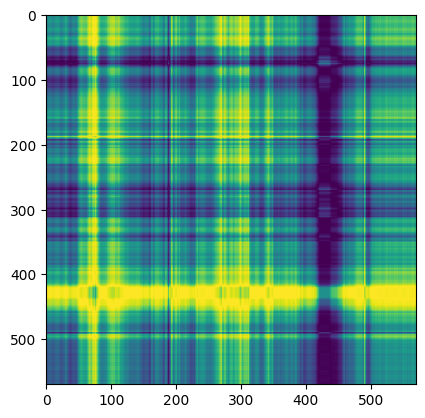

In [ ]:
# plot first row (recaled array)

imshow(X_train_GAF_L[0])

## 7.2 Transform validation dataset to image using GADF

In [ ]:
X_valid_GAF = transformer.transform(X_valid)
X_valid_GAF.shape

(30, 570, 570)

In [ ]:
# check min, max values

np.min(X_valid_GAF), np.max(X_valid_GAF)

(-0.9999999999996503, 0.9999999999996503)

In [ ]:
X_valid_GAF[0]

array([[ 0.00000000e+00,  5.70765580e-02,  1.18175601e-01, ...,
         7.71167540e-01,  8.62387372e-01,  8.62428385e-01],
       [-5.70765580e-02,  0.00000000e+00,  6.13063453e-02, ...,
         8.06247163e-01,  8.89876461e-01,  8.89913419e-01],
       [-1.18175601e-01, -6.13063453e-02,  0.00000000e+00, ...,
         8.40998146e-01,  9.16170652e-01,  9.16203121e-01],
       ...,
       [-7.71167540e-01, -8.06247163e-01, -8.40998146e-01, ...,
         0.00000000e+00, -1.58620842e-01, -1.58700836e-01],
       [-8.62387372e-01, -8.89876461e-01, -9.16170652e-01, ...,
         1.58620842e-01,  0.00000000e+00, -8.10202146e-05],
       [-8.62428385e-01, -8.89913419e-01, -9.16203121e-01, ...,
         1.58700836e-01,  8.10202146e-05,  0.00000000e+00]])

In [ ]:
# Normalise numbers with range (0,255)

X_valid_GAF_L = (((X_valid_GAF + 1) / 2)*255).astype(int)

In [ ]:
# check min, max values

np.min(X_valid_GAF_L), np.max(X_valid_GAF_L)

(0, 254)

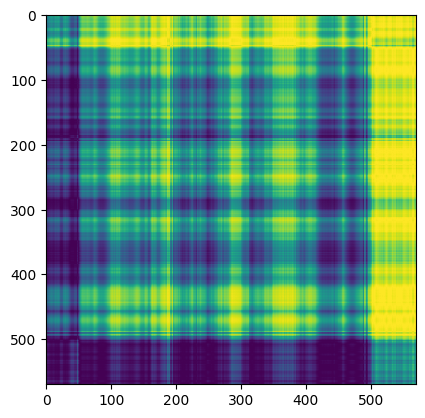

In [ ]:
# plot first row (original array)

imshow(X_valid_GAF[0])

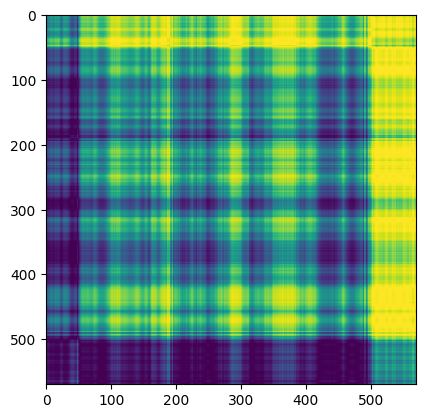

In [ ]:
# plot first row (recaled array)

imshow(X_valid_GAF_L[0])

# 8. Save images under class name subfolders

In [ ]:
from os.path import join

In [ ]:
root_folder = 'gaf_images'

# save train set images (e.g., train/class_name/0.png)

for i in range(len(y_train)):

    # define file names
    image_file_name = str(i) + '.png'

    # define folder names
    class_folder_name = str(y_train[i])
    full_path = os.path.join(root_folder, 'train')
    full_path = os.path.join(full_path, class_folder_name)

    # make folders
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    # save images
    image_file_name_with_full_path = os.path.join(full_path, image_file_name)
    plt.imsave(image_file_name_with_full_path, X_train_GAF_L[i])

In [ ]:
# save vaild set images (e.g., valid/class_name/0.png)

for i in range(len(y_valid)):

    # define file names
    image_file_name = str(i) + '.png'

    # define folder names
    class_folder_name = str(y_valid[i])
    full_path = os.path.join(root_folder, 'valid')
    full_path = os.path.join(full_path, class_folder_name)

    # make folders
    if not os.path.exists(full_path):
        os.makedirs(full_path)

    # save images
    image_file_name_with_full_path = os.path.join(full_path, image_file_name)
    plt.imsave(image_file_name_with_full_path, X_valid_GAF_L[i])

# 9. Prepare data for CNN

In [ ]:
# data block settings

my_random_seed = 42
my_batch_size = 8

In [ ]:
from fastai.vision.data import ImageDataLoaders

In [ ]:
data = ImageDataLoaders.from_folder(
    root_folder, train="train", valid='valid',
    seed=my_random_seed, bs=my_batch_size)

In [ ]:
len(data.train_ds), len(data.valid_ds)

(30, 30)

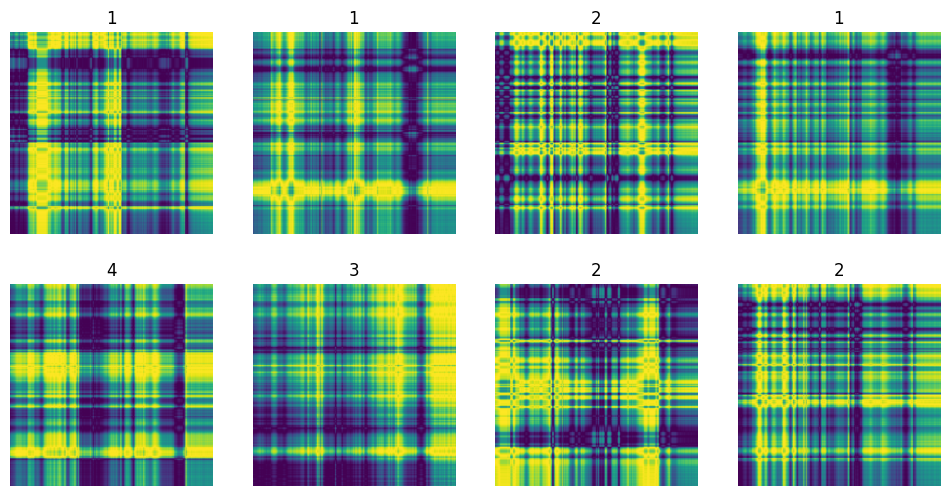

In [ ]:
# show image examples

data.show_batch(max_n=8, nrows=2)

# 10. Train CNN model

In [ ]:
img_folder_nm = "/content/gaf_images"
path = Path(img_folder_nm)

In [ ]:
dls = data.dataloaders(path)

IndexError: list index out of range

In [ ]:
"""
CNN classification 코드 입력
Early stopping, patience=10으로
epoch은 50으로
"""


learn = vision_learner(data, resnet18, metrics=accuracy).to_fp16() # resnet 18, 34, 50, 101, 152
learn.path = Path('./')

learn.fine_tune(50, cbs=[EarlyStoppingCallback(monitor='accuracy', patience=5),SaveModelCallback(monitor='accuracy')])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 199MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,2.717386,3.150452,0.166667,00:02


Better model found at epoch 0 with accuracy value: 0.1666666716337204.


/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

epoch,train_loss,valid_loss,accuracy,time
0,1.971010,2.152392,0.166667,00:01
1,1.749642,1.765192,0.300000,00:02
2,1.516645,1.702177,0.266667,00:01
3,1.439188,1.502301,0.366667,00:01
4,1.266864,1.276164,0.500000,00:01
5,1.107864,1.123173,0.666667,00:01
6,0.958091,1.067346,0.633333,00:01
7,0.847456,1.002484,0.633333,00:01
8,0.739781,0.963561,0.633333,00:01
9,0.662213,0.904675,0.700000,00:01


Better model found at epoch 0 with accuracy value: 0.1666666716337204.
Better model found at epoch 1 with accuracy value: 0.30000001192092896.
Better model found at epoch 3 with accuracy value: 0.36666667461395264.
Better model found at epoch 4 with accuracy value: 0.5.
Better model found at epoch 5 with accuracy value: 0.6666666865348816.
Better model found at epoch 9 with accuracy value: 0.699999988079071.
No improvement since epoch 9: early stopping


# 11 Confusion matrix and images with top losses

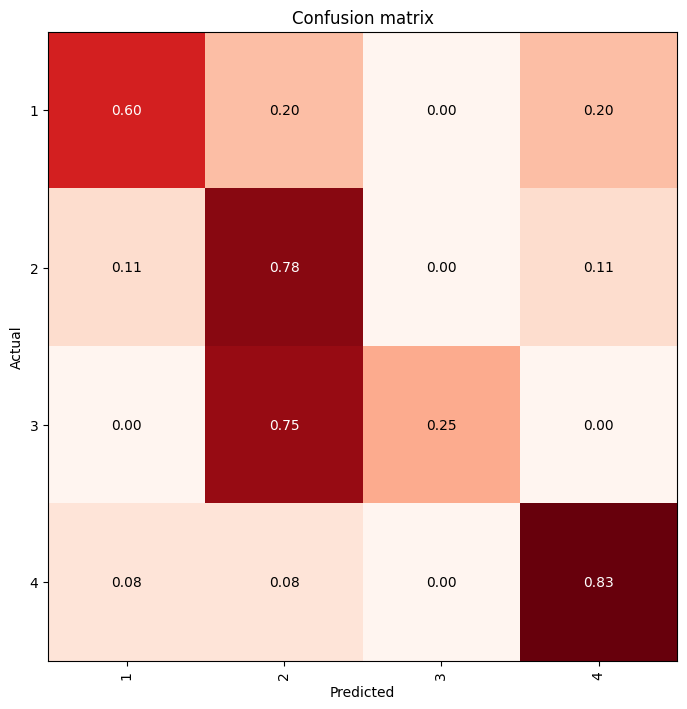

In [ ]:
"""
Confusion matrix 그리기
"""
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize=True, cmap='Reds', figsize=(7,7))  # normalized confusion matrix

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


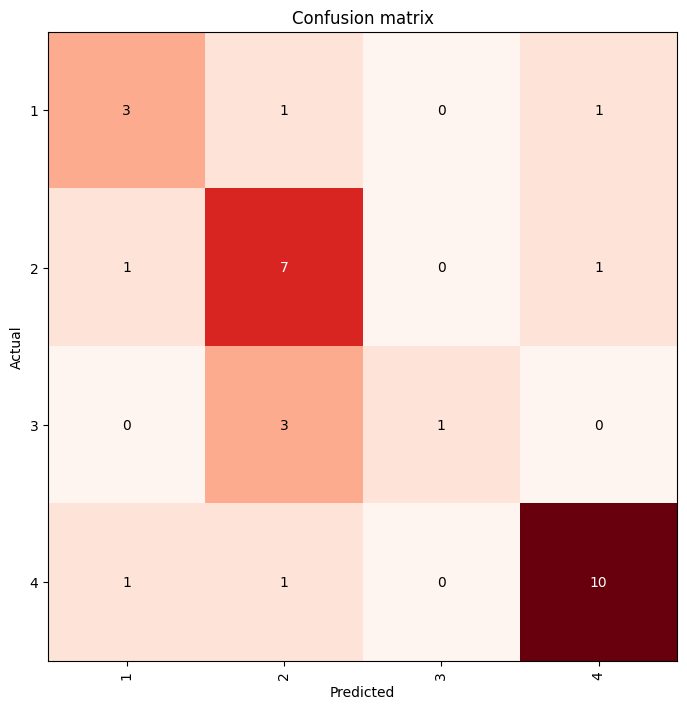

In [ ]:
"""
Confusion matrix 그리기
"""

# 왜 3번은 못 맞추는가?
# 3번 데이터량 자체가 없음
# 2, 3번을 잘 예측하라고 하지 않았음 -> 1, 4번 class는 잘 맞췄기 때문에 early stopping을 한 것. 어떤 클래스를 잘 예측할지, 고루 예측할지도 설정할 수 있음.
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(normalize=False, cmap='Reds', figsize=(7,7))  # normalized confusion matrix